# Import necessary libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

# Load dataset

In [63]:
Movies = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")
Movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [65]:
Movies.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Data preprocessing

In [66]:
Movies.dropna(inplace=True)

In [67]:
Movies['Actors'] = Movies['Actor 1'].astype(str) + ', ' + Movies['Actor 2'].astype(str) + ', ' + Movies['Actor 3'].astype(str)


In [68]:
Movies = Movies.drop(['Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actors
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor"
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"
...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,"Vicky Kaushal, Sarah Jane Dias, Raaghavv Chanana"
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,"Karisma Kapoor, Rekha, Manoj Bajpayee"
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,"Chiranjeevi, Jayamalini, Rajinikanth"
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,"Akshay Kumar, Twinkle Khanna, Aruna Irani"


In [69]:
Movies['Actors']=LabelEncoder().fit_transform(Movies['Actors'])
Movies['Genre'] = LabelEncoder().fit_transform(Movies['Genre'])
Movies['Director'] = LabelEncoder().fit_transform(Movies['Director'])


# EDA Visualizations

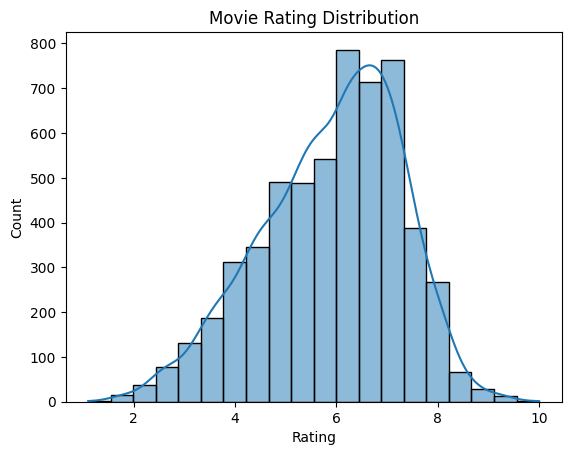

In [70]:
sns.histplot(Movies['Rating'], bins=20, kde=True)
plt.title("Movie Rating Distribution")
plt.show()

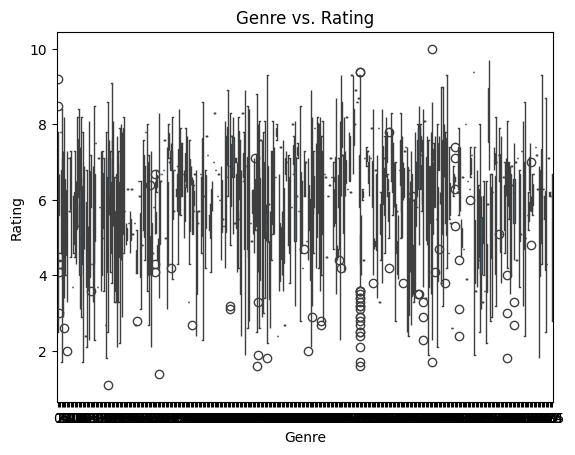

In [71]:
sns.boxplot(x='Genre', y='Rating', data=Movies)
plt.title("Genre vs. Rating")
plt.show()

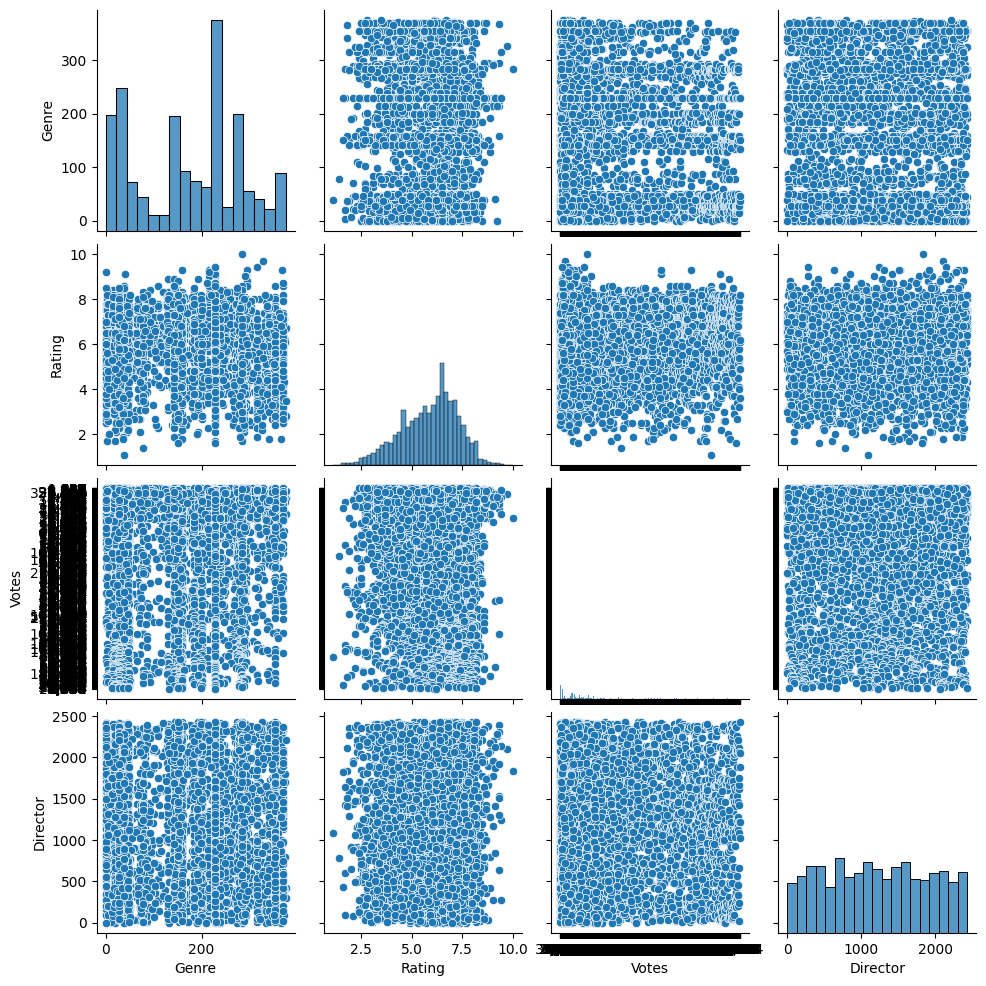

In [14]:
sns.pairplot(Movies, vars=['Genre','Rating','Votes','Director'])
plt.show()


# Features & Target

In [72]:
imputer = SimpleImputer(strategy='mean')
Movies['Rating'] = imputer.fit_transform(Movies[['Rating']])

In [73]:
X = Movies[['Genre', 'Director', 'Actors']] # Changed from single brackets to double brackets [[]]
y = Movies['Rating']
X

,Genre,Director,Actors
1,229,629,3875
3,184,1335,3343
5,157,1530,1119
6,289,2044,2086
8,320,135,5562
...,...,...,...
15493,229,1223,5358
15494,133,2059,2284
15503,28,1793,1170
15505,38,1025,364


In [74]:
y

,Rating
1,7.0
3,4.4
5,4.7
6,7.4
8,5.6
...,...
15493,6.1
15494,6.2
15503,5.8
15505,4.5


# Split data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Predict & Evaluate

In [77]:
y_pred_lin = model.predict(X_test)

In [78]:
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))


Linear Regression RMSE: 1.3513110346684756


In [79]:
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lin))

Linear Regression R2 Score: 0.013879963227141245


# Visualization of predictions

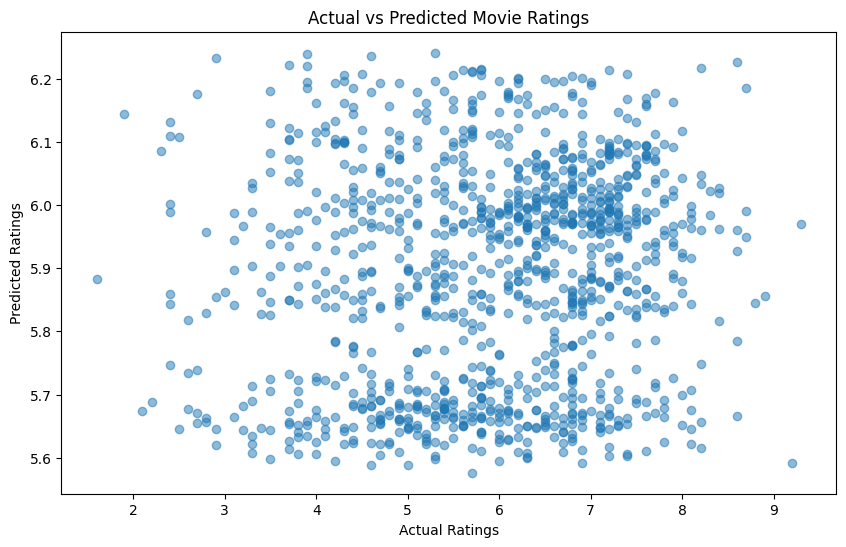

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.5) # Change y_pred to y_pred_lin or y_pred_rf
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.show()

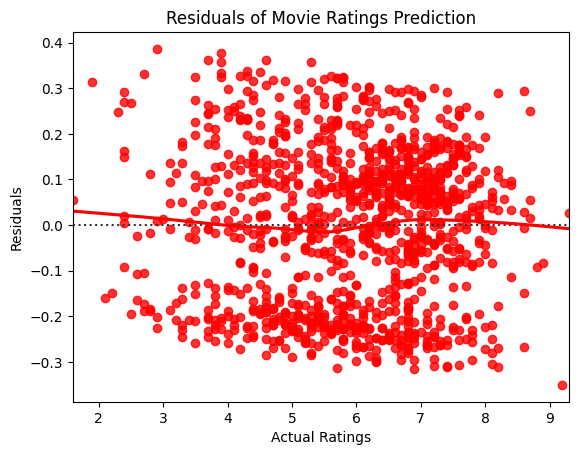

In [81]:
sns.residplot(x=y_test, y=y_pred_lin, lowess=True, color='red')
plt.xlabel("Actual Ratings")
plt.ylabel("Residuals")
plt.title("Residuals of Movie Ratings Prediction")
plt.show()

# Random Forest Model

In [82]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)
rf_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

In [83]:
y_pred_rf = rf_model.best_estimator_.predict(X_test)


In [84]:
print("Best Parameters:", rf_model.best_params_)
print("RandomForest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("RandomForest R2 Score:", r2_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': 10, 'n_estimators': 200}
RandomForest RMSE: 1.2994634421876863
RandomForest R2 Score: 0.08809988838884464
